<a href="https://colab.research.google.com/github/afnarimzi/Fuel-Insights-/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Highway MPG Using Multiple Linear Regression**

This project aims to build a Multiple Linear Regression (MLR) model to predict Fuel Information.Highway mpg (miles per gallon on highways) using selected independent variables from the Corgis Cars Dataset. The goal is to analyze the relationship between car dimensions, fuel efficiency, and engine performance.



## Loading the dataset:

In [1]:

import pandas as pd
df=pd.read_csv("/content/cars.csv")
#Display basic information about dtaset
df.info()
#Shape of Data Set
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [2]:
#check first few rows of dataset
display(df.head())

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [3]:
#Type of data
print(df.dtypes)

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

In [4]:
#summary statistics
display(df.describe())

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


# Data Preprocessing :

In [5]:
#check for missing value
print(df.isnull().sum())

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


In [6]:
#check for duplicates
print(df.duplicated().sum())
#remove duplicates
df=df.drop_duplicates()
display(df)

18


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [7]:
#check Numerical and Categorical variables
numerical=df.select_dtypes(include=['number']).columns
categorical=df.select_dtypes(include=['object']).columns
print("Numerical variable:",len(numerical))
print("Categorical VAriable:",len(categorical))

print("Numerical columns:",numerical)


print("\nCategorical columns:",categorical)


Numerical variable: 9
Categorical VAriable: 8
Numerical columns: Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

Categorical columns: Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Transmission', 'Fuel Information.Fuel Type',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year'],
      dtype='object')


In [8]:
# Convert categorical variables into numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical, drop_first=True).astype(int)
display(df)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Identification.Model Year_2012 Volkswagen Tiguan,Identification.Model Year_2012 Volkswagen Touareg,Identification.Model Year_2012 Volkswagen Touareg Hybrid,Identification.Model Year_2012 Volvo C30,Identification.Model Year_2012 Volvo C70,Identification.Model Year_2012 Volvo S60,Identification.Model Year_2012 Volvo S80,Identification.Model Year_2012 Volvo XC60,Identification.Model Year_2012 Volvo XC70,Identification.Model Year_2012 Volvo XC90
0,140,143,202,1,6,18,25,2009,250,236,...,0,0,0,0,0,0,0,0,0,0
1,140,143,202,1,6,22,28,2009,200,207,...,0,0,0,0,0,0,0,0,0,0
2,140,143,202,1,6,21,30,2009,200,207,...,0,0,0,0,0,0,0,0,0,0
3,140,143,202,1,6,21,28,2009,200,207,...,0,0,0,0,0,0,0,0,0,0
5,91,17,62,1,6,16,27,2009,265,243,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,1,5,18,25,2012,250,253,...,0,0,0,0,0,0,0,0,0,0
5072,141,249,108,1,6,12,20,2012,552,398,...,0,0,0,0,0,0,0,0,0,0
5073,160,249,108,1,6,12,20,2012,552,398,...,0,0,0,0,0,0,0,0,0,0
5074,200,210,110,1,6,17,25,2012,315,330,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis (EDA) :

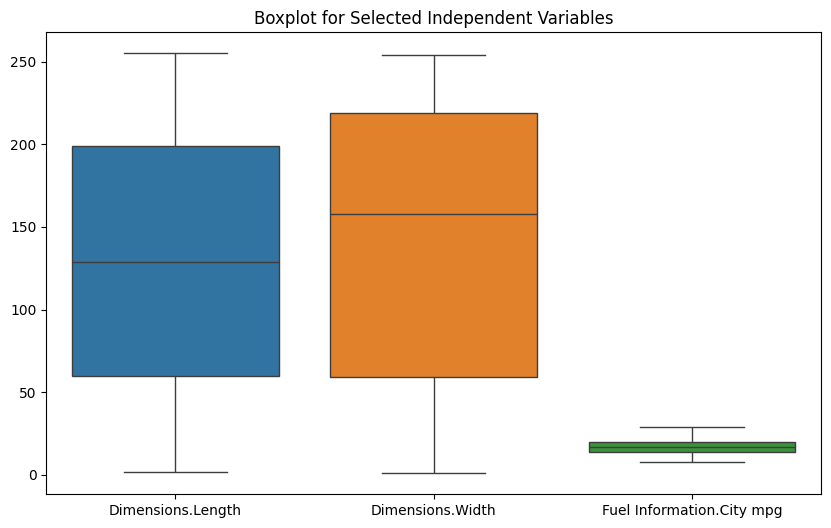

In [28]:

# Boxplot for selected independent variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg']])
plt.title("Boxplot for Selected Independent Variables")
plt.show()

In [31]:

selected_columns = ['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg']

# Remove outliers using IQR for each selected column
for col in selected_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers in the column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display the cleaned dataset for selected columns only
display(df[selected_columns])

# Print the shape of the cleaned dataframe
print(df[selected_columns].shape)

,Dimensions.Length,Dimensions.Width,Fuel Information.City mpg
0,143,202,18
1,143,202,22
2,143,202,21
3,143,202,21
5,17,62,16
...,...,...,...
5069,253,201,18
5070,253,201,17
5071,253,201,18
5074,210,110,17


(4886, 3)


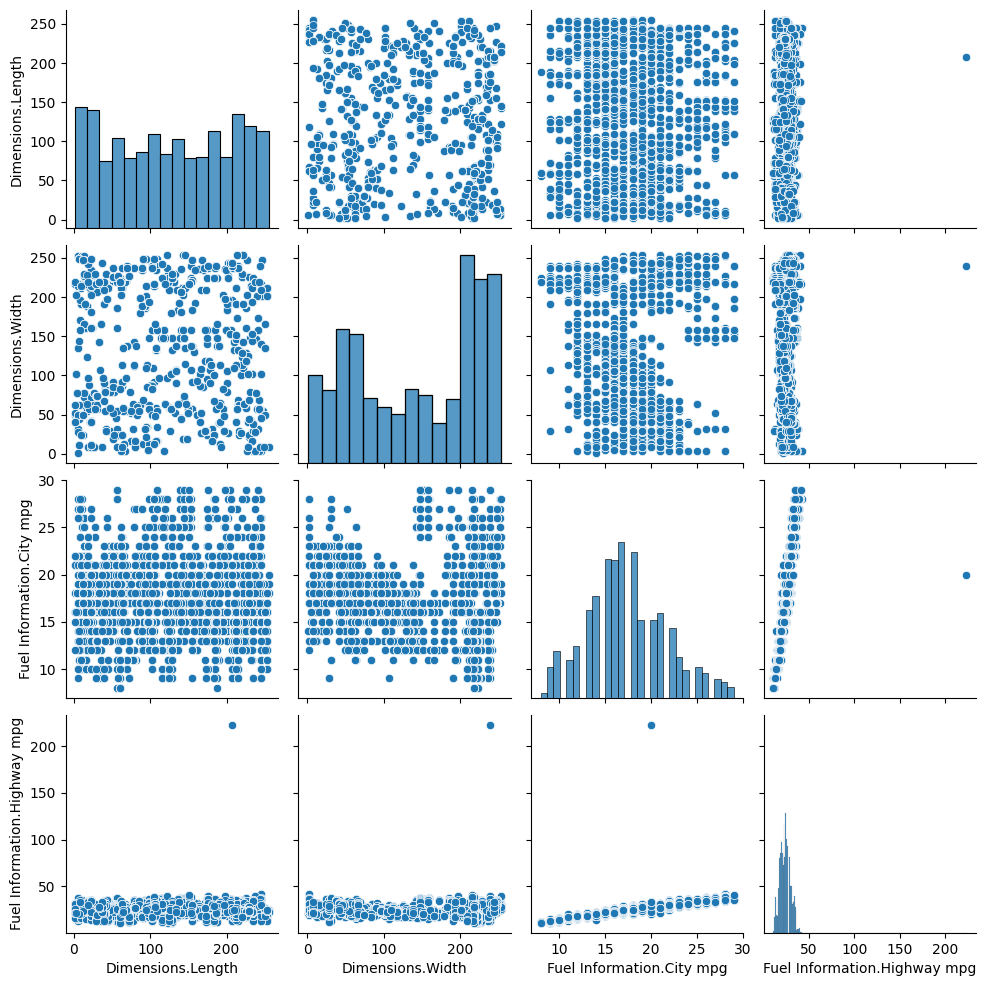

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot or pairplot to visualize relationships
sns.pairplot(df[['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg']])
plt.show()

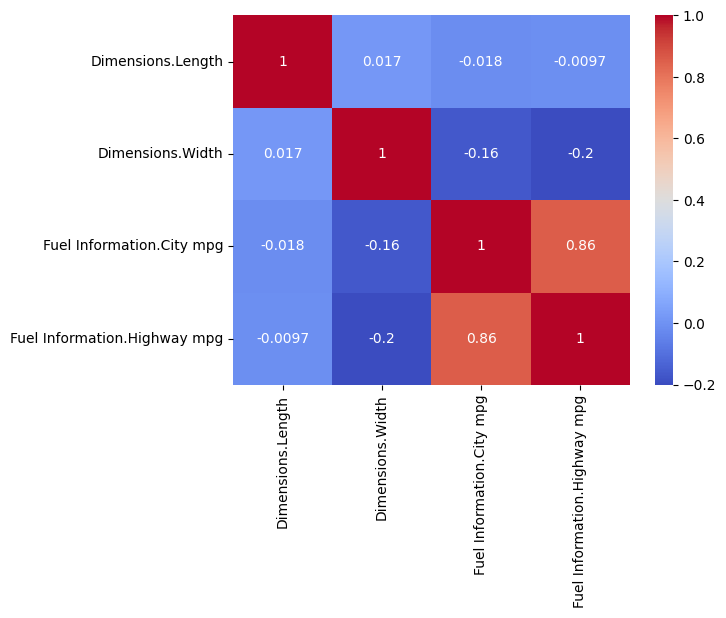

In [33]:
# Correlation heatmap
corr = df[['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<ipython-input-34-3acbe61e4f3a>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(df['Dimensions.Length'],


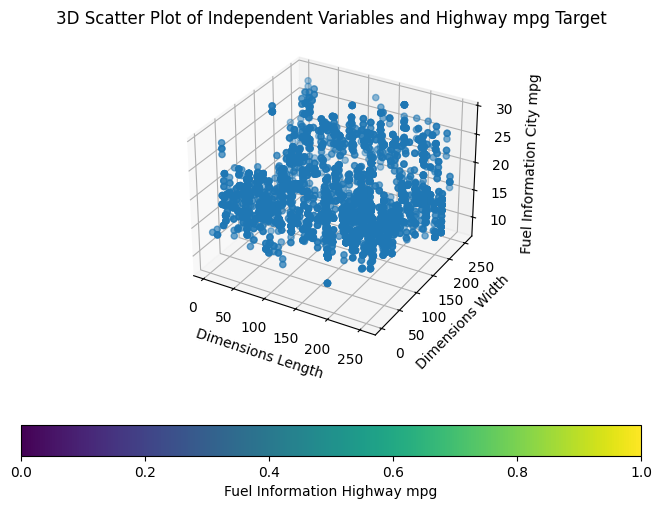

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with the target variable as the color
scatter = ax.scatter(df['Dimensions.Length'],
                     df['Dimensions.Width'],
                     df['Fuel Information.City mpg']
                     cmap='viridis',
                     marker='o')

# Set the axis labels
ax.set_xlabel('Dimensions Length')
ax.set_ylabel('Dimensions Width')
ax.set_zlabel('Fuel Information City mpg')

# Set the title
ax.set_title('3D Scatter Plot of Independent Variables and Highway mpg Target')

# Add color bar for better interpretation of color scale
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal')
cbar.set_label('Fuel Information Highway mpg')

# Display the plot
plt.show()

# Variance Inflation Factor (VIF) Analysis :

In [35]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numerical independent variables (excluding target variable)
X = df[['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg',]]

# Add a constant (intercept term)
X_with_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame({
    "Feature": X_with_const.columns,
    "VIF": [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
})

# Display VIF values
print(vif_data)


                     Feature        VIF
0                      const  26.006637
1          Dimensions.Length   1.000530
2           Dimensions.Width   1.027685
3  Fuel Information.City mpg   1.027707


# Feature Scaling :

In [36]:
# Select only the columns you want to include for feature selection
selected_columns = ['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg']

df_selected = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation between features and target variable
print(correlation_matrix['Fuel Information.Highway mpg'])

# Select the features that are most correlated with the target
selected_features = correlation_matrix['Fuel Information.Highway mpg'].sort_values(ascending=False).index[1:]

# Show selected features
print("Selected Features:", selected_features)


Dimensions.Length              -0.009748
Dimensions.Width               -0.201007
Fuel Information.City mpg       0.858435
Fuel Information.Highway mpg    1.000000
Name: Fuel Information.Highway mpg, dtype: float64
Selected Features: Index(['Fuel Information.City mpg', 'Dimensions.Length', 'Dimensions.Width'], dtype='object')


In [38]:
from sklearn.preprocessing import StandardScaler

X = df[[ 'Dimensions.Width', 'Fuel Information.City mpg','Dimensions.Length']]

y = df['Fuel Information.Highway mpg']

# Apply standard scaling to the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled features
print("Scaled Features:\n", X_scaled[:5])  # Display the first 5 scaled features


Scaled Features:
 [[ 0.7190662   0.1591348   0.19526025]
 [ 0.7190662   1.08421825  0.19526025]
 [ 0.7190662   0.85294739  0.19526025]
 [ 0.7190662   0.85294739  0.19526025]
 [-1.01751776 -0.30340692 -1.433525  ]]


# Building the Multiple Linear Regression Model :

In [39]:
# Define Independent Variables (X) and Dependent Variable (y)
X = df[['Dimensions.Length', 'Dimensions.Width', 'Fuel Information.City mpg']]
y = df['Fuel Information.Highway mpg']


In [40]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (3908, 3)
Testing Set Size: (978, 3)


In [41]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Get model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [-0.41028703  5.43532546  0.05492764]
Intercept: 24.178030246948808


In [42]:
# Predict the highway mpg for test data
y_pred = model.predict(X_test)

# Print some predicted values
print("Predicted values:", y_pred[:5])  # Show first 5 predictions


Predicted values: [29.7193417  33.4698553  22.56074617 24.43665081 19.75776367]


In [43]:
print("Actual values:", y_test[:5].values)


Actual values: [31 36 26 25 18]


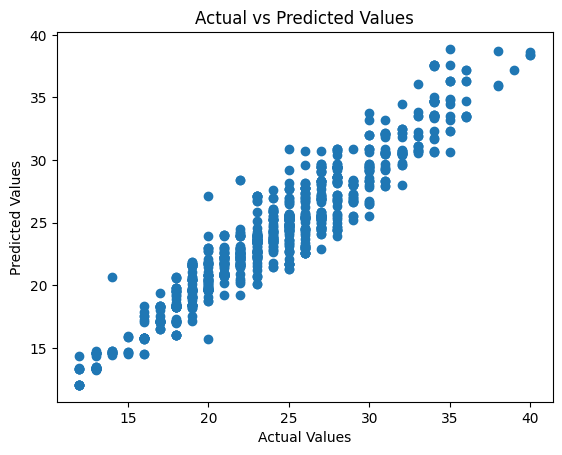

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


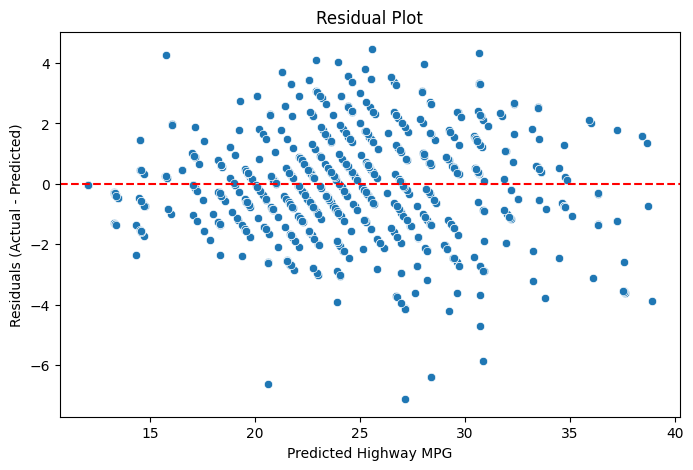

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals (errors)
residuals = y_test.values - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Predicted Highway MPG")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


# Model Evaluation :

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 2.772801700799634
R² Score: 0.9091274621320187


In this project, we developed a Multiple Linear Regression model to predict highway miles per gallon (Fuel Information.Highway mpg) based on vehicle dimensions and city mileage. Through data preprocessing, VIF analysis, exploratory data visualization, and model evaluation, we identified key factors influencing fuel efficiency.

The model achieved a high R² score of 0.9091, indicating a strong correlation between the independent variables and the target variable. The Mean Squared Error (MSE) of 2.7728 suggests a reasonable level of accuracy in predictions.